In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Transformed Data Set - Logistics regression.csv')

In [3]:
data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [5]:
data.describe(include='O').T

,count,unique,top,freq
Favorite Color,66,3,Cool,37
Favorite Music Genre,66,7,Rock,19
Favorite Beverage,66,6,Doesn't drink,14
Favorite Soft Drink,66,4,Coca Cola/Pepsi,32
Gender,66,2,F,33


In [6]:
data.columns

Index(['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink', 'Gender'],
      dtype='object')

In [7]:
data.replace({'Gender':{'F':0,'M':1}},inplace=True)

In [8]:
data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,0
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,0
2,Warm,Rock,Wine,Coca Cola/Pepsi,0
3,Warm,Folk/Traditional,Whiskey,Fanta,0
4,Cool,Rock,Vodka,Coca Cola/Pepsi,0
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,1
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,1
63,Neutral,Hip hop,Doesn't drink,Fanta,1
64,Cool,Rock,Wine,Coca Cola/Pepsi,1


In [9]:
print(data['Favorite Color'].nunique())	
print(data['Favorite Music Genre'].nunique())	
print(data['Favorite Beverage'].nunique())	
print(data['Favorite Soft Drink'].nunique())	

3
7
6
4


In [10]:
print(data['Favorite Color'].unique())	
print(data['Favorite Music Genre'].unique())	
print(data['Favorite Beverage'].unique())	
print(data['Favorite Soft Drink'].unique())	

['Cool' 'Neutral' 'Warm']
['Rock' 'Hip hop' 'Folk/Traditional' 'Jazz/Blues' 'Pop' 'Electronic'
 'R&B and soul']
['Vodka' 'Wine' 'Whiskey' "Doesn't drink" 'Beer' 'Other']
['7UP/Sprite' 'Coca Cola/Pepsi' 'Fanta' 'Other']


In [11]:
data['Favorite Music Genre'].value_counts()


Favorite Music Genre
Rock                19
Pop                 17
Hip hop              8
Electronic           8
R&B and soul         6
Folk/Traditional     4
Jazz/Blues           4
Name: count, dtype: int64

In [12]:
data['Favorite Color'].value_counts()

Favorite Color
Cool       37
Warm       22
Neutral     7
Name: count, dtype: int64

In [13]:
data['Favorite Soft Drink'].value_counts()

Favorite Soft Drink
Coca Cola/Pepsi    32
Fanta              14
7UP/Sprite         13
Other               7
Name: count, dtype: int64

In [14]:
data['Favorite Beverage'].value_counts()

Favorite Beverage
Doesn't drink    14
Beer             13
Other            11
Wine             10
Vodka             9
Whiskey           9
Name: count, dtype: int64

In [15]:
data = data.drop(data[data['Favorite Soft Drink']=='Other'].index)
print(data['Favorite Soft Drink'].unique())	

['7UP/Sprite' 'Coca Cola/Pepsi' 'Fanta']


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        59 non-null     object
 1   Favorite Music Genre  59 non-null     object
 2   Favorite Beverage     59 non-null     object
 3   Favorite Soft Drink   59 non-null     object
 4   Gender                59 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 2.8+ KB


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
data.columns

Index(['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink', 'Gender'],
      dtype='object')

In [19]:
for i in ['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink']:
    data[i]=le.fit_transform(data[i])

In [20]:
data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0
5,2,3,1,2,0
6,0,4,0,1,0
7,2,4,4,2,0
8,2,6,2,0,0
9,1,4,5,1,0


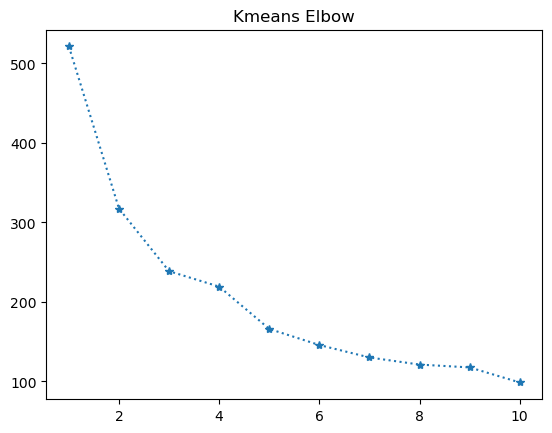

In [23]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11),inertia,marker='*',ls=':')
plt.title('Kmeans Elbow')
plt.show();

In [24]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(data)
data['clusters'] = clusters

In [25]:
data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender,clusters
0,0,6,3,0,0,3
1,1,2,3,1,0,4
2,2,6,5,1,0,2
3,2,1,4,2,0,4
4,0,6,3,1,0,3
5,2,3,1,2,0,1
6,0,4,0,1,0,1
7,2,4,4,2,0,2
8,2,6,2,0,0,3
9,1,4,5,1,0,2


In [26]:
data[data['clusters']==4]

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender,clusters
1,1,2,3,1,0,4
3,2,1,4,2,0,4
13,2,0,5,1,0,4
24,0,1,4,0,0,4
35,2,0,2,1,1,4
56,2,1,2,2,1,4
57,2,0,3,2,1,4
60,0,0,4,1,1,4


In [27]:
data[data['clusters']==2]

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender,clusters
2,2,6,5,1,0,2
7,2,4,4,2,0,2
9,1,4,5,1,0,2
12,2,4,5,0,0,2
15,2,3,5,1,0,2
16,0,4,5,0,0,2
21,2,3,4,2,0,2
25,2,5,4,1,0,2
38,0,4,4,2,1,2
46,0,2,5,1,1,2


In [28]:
import pickle

with open("transformed_model.pkl", "wb") as file:
    pickle.dump(kmeans, file)

print("✅ Model saved!")

✅ Model saved!
